In [25]:
import obspy
import numpy as np
import scipy.fft as sy_fft
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from obspy.signal.util import next_pow_2
from scipy.signal import find_peaks
from scipy.signal import correlate

In [26]:
def prepapre(signals):
    line,size=np.shape(signals)
    sig_fft=sy_fft.fft(signals,size*2)
    phase=np.unwrap(np.angle(hilbert(signals,axis=1)))
    cig=sy_fft.fft(np.multiply(np.cos(phase),signals),size*2)
    sig=sy_fft.fft(np.multiply(np.sin(phase),signals),size*2)
    hig=sy_fft.fft(signals,size*2,1)
    return sig_fft,cig,sig,hig,phase
def MCC(size,f1,f2,pair1,pair2):
    return np.roll(
        sy_fft.ifft(
           f1[pair1]*f2[pair2].conj()
        ,size*2)
        ,size).real
def MMCC(size,cig1,sig1,hig1,cig2,sig2,hig2,pair1,pair2):
    return np.roll(
        sy_fft.ifft(cig1[pair1]*cig2[pair2].conj()+\
        sig1[pair1]*sig2[pair2].conj()+\
        hig1[pair1]*hig2[pair2].conj(),\
        size*2)
        ,size).real/2
def plot_peak(ax,array,sampling_rate,npts):
    peak=np.argmax(array)
    ax.plot((peak-npts)/sampling_rate,array[peak],"o")

In [27]:
signals=obspy.read("H:/util/temp/20160906U041331.310/*z",format="SAC")
signals.detrend();signals.taper(max_percentage=0.05,type="hann")
signals.filter("bandpass",freqmin=0.1,freqmax=1)
test=np.zeros((len(signals),signals[0].stats.npts))
norm_base=np.empty(len(signals))
for i in range(0,len(signals)):
    test[i]=signals[i].data
    norm_base[i]=np.sqrt(np.sum(np.square(test[i])))

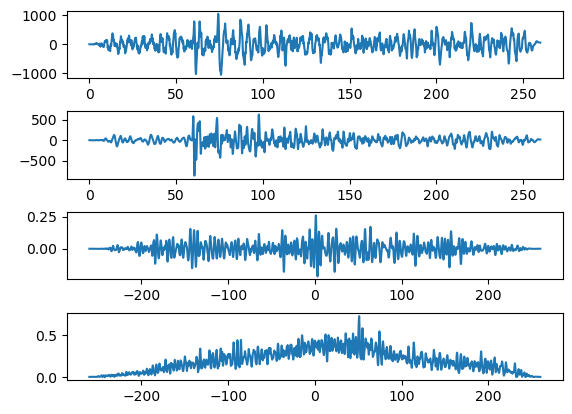

In [28]:
line,size=np.shape(test)
f1,sig1,cig1,hig1,args1=prepapre(test)
f2,sig2,cig2,hig2,args2=prepapre(np.roll(test,-5000))

cor1_clean=MCC(size,f1,f1,1,20)/norm_base[1]/norm_base[20]
#cor2=MCC(size,f2,f1,1,-1)/norm_base[1]/norm_base[-1]
cor1_MCC_clean=MMCC(size,cig1,sig1,hig1,
                    cig1,sig1,hig1,1,20) \
               /norm_base[20]/norm_base[-1]
cor2_MCC_clean=MMCC(size,cig1,sig1,hig1,
                    cig2,sig2,hig2,1,20) \
         /norm_base[20]/norm_base[-1]

cor3=correlate(test[1],test[-1],mode="full").real/norm_base[1]/norm_base[-1]
cor4=correlate(test[-1],test[-1],mode="full")

test_fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=4)
ax1.plot(np.arange(size)/100,test[1])
ax2.plot(np.arange(size)/100,test[-1])
ax3.plot(np.arange(np.shape(cor1_clean)[0])/100-size/100,cor1_clean)
ax4.plot(np.arange(np.shape(cor2_MCC_clean)[0])/100-size/100,cor2_MCC_clean)
plt.subplots_adjust(hspace=0.5)
#ax3.plot(np.arange(np.shape(cor3)[0]),cor3)

#peaks, _ = find_peaks(cor3)
#ax3.plot(peaks,cor3[peaks],"o")
#peaks_height=cor3[peaks]
#max_list=peaks_height[cor3[peaks].argsort()]
#ax4.plot(range(len(peaks)),max_list)


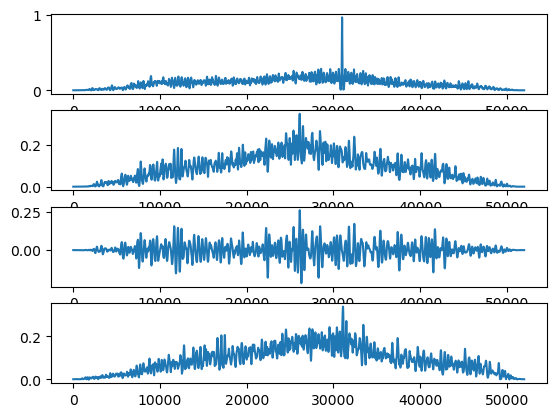

In [29]:
test_fig_MCC,(a1,a2,a3,a4)=plt.subplots(nrows=4)

cor1_MCC=MMCC(size,cig1,sig1,hig1,cig2,sig2,hig2,-1,-1)\
        /norm_base[-1]/norm_base[-1]
cor2_MCC_used=MMCC(size,cig1,sig1,hig1,cig1,sig1,hig1,1,20) \
         /norm_base[20]/norm_base[1]

cor3_MCC_used=MCC(size,f1,f1,1,20) \
         /norm_base[1]/norm_base[20]
cor4_MCCc_used=MMCC(size,cig1,sig1,hig1,cig2,sig2,hig2,1,20)\
         /norm_base[1]/norm_base[20]

a1.plot(
    np.arange(size*2),cor1_MCC
)
a2.plot(
    np.arange(len(cor2_MCC)),cor2_MCC
)
a3.plot(
    np.arange(len(cor3_MCC_used)),cor3_MCC_used
)
a4.plot(
    np.arange(len(cor4_MCCc_used)),cor4_MCCc_used
)


In [30]:
signals=obspy.read(
    "E:/project/ChinArray3-PRF/1_rot/20160713U130425.480/*z",
    format="SAC")
signals.detrend();signals.taper(max_percentage=0.05,type="hann")
signals.filter("bandpass",freqmin=0.1,freqmax=1)

line=len(signals)
npts=signals[0].stats.npts
mat_signals=np.zeros([line,npts])
norm_base=np.empty(line)

for i in range(0,line):
    mat_signals[i]=signals[i].data
    norm_base[i]=np.sqrt(np.sum(np.square(mat_signals[i])))


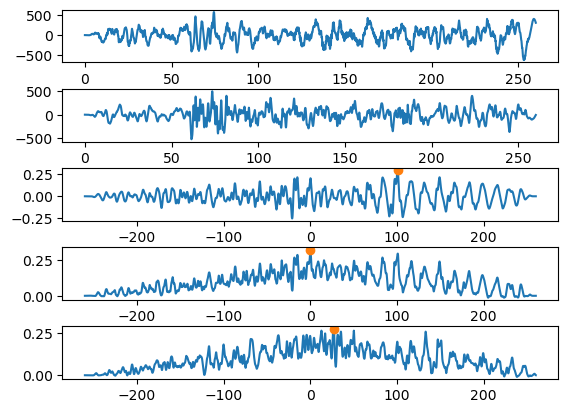

In [31]:
f1,sig1,cig1,hig1,args1=prepapre(mat_signals)
f2,sig2,cig2,hig2,args2=prepapre(np.roll(mat_signals,-5000))

#cor1=MCC(npts,f1,f1,1,-1)/norm_base[1]/norm_base[-1]
#cor2=MCC(npts,f1,f1,1,20)/norm_base[1]/norm_base[20]

#cor3=MMCC(npts,cig1,sig1,hig1,cig1,sig1,hig1,1,-1)/norm_base[1]/norm_base[-1]
cor4=MMCC(npts,cig1,sig1,hig1,
          cig1,sig1,hig1,1,20)/norm_base[1]/norm_base[20]
cor5=MMCC(npts,cig1,sig1,hig1,
          cig2,sig2,hig2,1,20)/norm_base[1]/norm_base[20]
cor2_temp=correlate(mat_signals[1][:npts],mat_signals[20][:npts],'full','fft')/norm_base[1]/norm_base[20]

test_fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=5)
ax1.plot(np.arange(npts)/100,mat_signals[1][:npts])
ax2.plot(np.arange(npts)/100,mat_signals[-1][:npts])
#ax3.plot(np.arange(npts*2)/100-npts/100,cor2)
ax3.plot(np.arange(npts*2-1)/100-npts/100,cor2_temp)
ax4.plot(np.arange(npts*2)/100-npts/100,cor4)
ax5.plot(np.arange(npts*2)/100-npts/100,cor5)
#peak1=np.argmax(cor2)
peak1=np.argmax(cor2_temp)
peak2=np.argmax(cor4)
peak3=np.argmax(cor5)
#ax3.plot(peak1/100-npts/100,cor2[peak1],"o")
ax3.plot(peak1/100-npts/100,cor2_temp[peak1],"o")
ax4.plot(peak2/100-npts/100,cor4[peak2],"o")
ax5.plot(peak3/100-npts/100,cor5[peak3],"o")
#test_fig.tight_layout()
#ax3.plot(peaks,cor3[peaks],"o")
#peaks_height=cor3[peaks]
#max_list=peaks_height[cor3[peaks].argsort()]
#ax4.plot(range(len(peaks)),max_list)
plt.subplots_adjust(hspace=0.5)

26.980000000000018


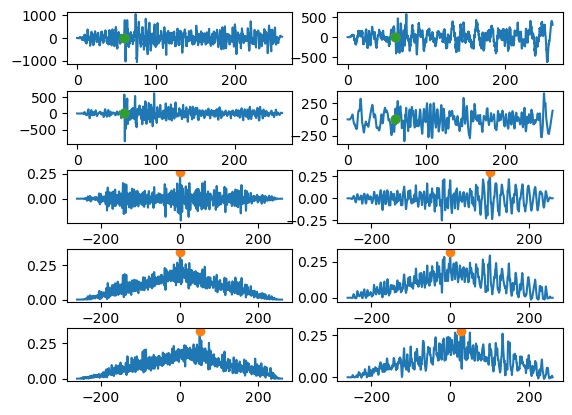

In [36]:
pp,axx=plt.subplots(5,2)
axx[0][1].plot(np.arange(npts)/100,mat_signals[1][:npts])
axx[1][1].plot(np.arange(npts)/100,mat_signals[20][:npts])
axx[0][0].plot(np.arange(size)/100,test[1])
axx[1][0].plot(np.arange(size)/100,test[-1])

axx[2][0].plot(np.arange(np.shape(cor3_MCC_used)[0])/100-size/100,cor3_MCC_used)
axx[3][0].plot(np.arange(np.shape(cor2_MCC_used)[0])/100-size/100,cor2_MCC_used)
axx[4][0].plot(np.arange(np.shape(cor4_MCCc_used)[0])/100-size/100,cor4_MCCc_used)
plot_peak(axx[2][0],cor3_MCC_used,100,size)
plot_peak(axx[3][0],cor2_MCC_used,100,size)
plot_peak(axx[4][0],cor4_MCCc_used,100,size)

axx[2][1].plot(np.arange(npts*2-1)/100-npts/100,cor2_temp)
axx[3][1].plot(np.arange(npts*2)/100-npts/100,cor4)
axx[4][1].plot(np.arange(npts*2)/100-npts/100,cor5)

plot_peak(axx[2][1],cor2_temp,100,npts)
plot_peak(axx[3][1],cor4,100,npts)
plot_peak(axx[4][1],cor5,100,npts)
plt.subplots_adjust(hspace=0.5)
for i in [0,1]:
    for j in [0,1]:
        axx[i][j].plot(60,0,"o")
for i in [0,1]:
    for j in [0,1]:
        axx[i][j].plot(60,0,"o")
print(peak3/100-npts/100)

In [33]:
signals = obspy.read(
    "/home/jous/Desktop/E/project/ChinArray3-PRF/1_rot/20160823U193944.580/*z",
    format="SAC")
signals.detrend();
signals.taper(max_percentage=0.05, type="hann")
signals.filter("bandpass", freqmin=0.1, freqmax=1)

line = len(signals)
npts = signals[0].stats.npts
mat_signals = np.zeros([line, npts * 2])
norm_base = np.empty(line)

for i in range(0, line):
    mat_signals[i, :npts] = signals[i].data
    norm_base[i] = np.sqrt(np.sum(np.square(mat_signals[i])))


Exception: No file matching file pattern: /home/jous/Desktop/E/project/ChinArray3-PRF/1_rot/20160823U193944.580/*z

In [ ]:
f1,sig1,cig1,hig1,args1=prepapre(mat_signals)

cor1=MCC(npts,f1,f1,1,-1)/norm_base[1]/norm_base[-1]
cor2=MCC(npts,f1,f1,1,20)/norm_base[1]/norm_base[20]

cor3=MMCC(npts,cig1,sig1,hig1,cig1,sig1,hig1,1,-1)/norm_base[1]/norm_base[-1]
cor4=MMCC(npts,cig1,sig1,hig1,cig1,sig1,hig1,1,20)/norm_base[1]/norm_base[20]

test_fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=4)
ax1.plot(np.arange(npts*2),cor1)
ax2.plot(np.arange(npts*2),cor2)
ax3.plot(np.arange(npts*2),cor3)
ax4.plot(np.arange(npts*2),cor4)

peaks, _ = find_peaks(cor3)
#ax3.plot(peaks,cor3[peaks],"o")
#peaks_height=cor3[peaks]
#max_list=peaks_height[cor3[peaks].argsort()]
#ax4.plot(range(len(peaks)),max_list)


In [ ]:
print(np.var(cor1),"\t",
      np.var(cor2),"\t",
      np.var(cor3),"\t",
      np.var(cor4),"\t",
      )